# Interpolation

## Linear Interpolation

This example presents a Jupyter Notebook that solves a common geopolitical problem, namely that of turning a capital city onto a smoking crater by a ballistic missle whose immediate post-boost phase velocity $v_o$ and angle relative to the Earth (treated as a plane) $\Theta$ is known.

:::{note}
The example is primarily to illustrate the Jupyter environment, and many parts of the notebook are explained later in the course. 
:::

## Logarithmic Interpolation






## Polynomial Interpolation

This next section examines a type of data model useful for interpolating data that are known to be accurate (very small measurement error)

### Background 

The Starship rocket in the figure below sends a lot of telemetry data to both on-board and off-board (ground-based) control computers.  

![https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/SpaceX_Starship_SN8_launch_as_viewed_from_South_Padre_Island.jpg/800px-SpaceX_Starship_SN8_launch_as_viewed_from_South_Padre_Island.jpg](800px-SpaceX_Starship_SN8_launch_as_viewed_from_South_Padre_Island.png)

Suppose telemetry is received every 1/10 of a second, providing the altitude (position) of the craft, something like the figure below.

![](altitude-time.png)

How can one estimate the altitude at intermediate times (between the 1/10 of a second "true" values)?

The problem is a type of interpolation problem similar to calculating material properties from tables for intermediate values by assuming a straight line passed between the two values from the table. However it may not be appropriate to assume that the altitudes are linear with time.  The special challenge comes when we want to estimate intermediate values when there is a maximum or minimum in the tabular structure, and we will have to process many records for different cases.

The classical approach to such a problem is to fit a polynomial to the tabular results and interrogate the resulting polynomial to obtain estimates of the intermediate values.  This prediction engine (the polynomial) is required to return the exact value at a observation location (in our case a 1/10 second interval).  This requirement is quite distinct from other types of prediction engines we will study.

<hr>

### Lagrangian Interpolation

Polynomial interpolation is the method of determining a polynomial that fits a set of given points. There are several approaches to polynomial interpolation, of which one of the most well known is the Lagrangian method. The Lagrangian polynomial [https://en.wikipedia.org/wiki/Lagrange_polynomial](https://en.wikipedia.org/wiki/Lagrange_polynomial) is the polynomial of order $n-1$, where $n$ is he number of tabular data pairs we wish to interpolate. 

Suppose we have a table of data (or telemetry sent back from our rocket), of $x-$ and $f(x)$-values:

|$$x~$$  | $$~f(x)$$   |
|:---  | :--- |
|$$x_1$$ |$$f_1$$|
|$$x_2$$   |$$f_2$$|
|$$x_3$$   |$$f_3$$|
|$$x_4$$ |$$f_4$$|

The highest order polynomial that can be passed through these four data pairs is a cubic.  A Lagrangian form for such a cubic is

$$ P_3(x) = f(x_1)\frac{(x-x_2)(x-x_3)(x-x_4)}{(x_1-x_2)(x_1-x_3)(x_1-x_4)} + f(x_2)\frac{(x-x_1)(x-x_3)(x-x_4)}{(x_2-x_1)(x_2-x_3)(x_2-x_4)} + f(x_3)\frac{(x-x_1)(x-x_2)(x-x_4)}{(x_3-x_1)(x_3-x_2)(x_3-x_4)} +f(x_4)\frac{(x-x_1)(x-x_2)(x-x_3)}{(x_4-x_1)(x_4-x_2)(x_4-x_3)} $$

Notice that it is constructed of four terms, each of which is a cubic in $x$; hence the sum is a cubic also.  The pattern of each term is to form the numerator as a product of differences of the form $(x-x_i)$, omitting one $x_i$ in each term, the ommitted term is used in the denominator as a replacement for $x$ in each position in the numerator.  In each term, the difference factor is multiplied by the value $f_i$ corresponding to the $x_i$ ommitted in the numerator. The Lagragian polynomial for other degrees of interpolating polynomials employs this same pattern of forming a sum of polynomials of the desired degree. 

Of importance is that the polynomial is intended to be used for interpolation, that is the value we seek $P(x^*)$ assumes we will supply $x^*$ in the range $[x_1 , x_4]$.  Going outside this range is called extrapolation, and interpolator-type prediction engines are the wromg tool!

<hr>

### Example 1

Consider the three observations below, estimate (predict) the value for $f(2.3)$.

|$$x~$$  | $$~f(x)$$   |
|:---  | :--- |
|1.1  |10.6|
|1.7  |15.2|
|3.0  |20.3|

The Lagrangian form of the highest order of polynomial that can pass through the 3 data pairs is the quadratic:

$$ P_2(x) = f(x_1)\frac{(x-x_2)(x-x_3)}{(x_1-x_2)(x_1-x_3)} + f(x_2)\frac{(x-x_1)(x-x_3)}{(x_2-x_1)(x_2-x_3)} + f(x_3)\frac{(x-x_1)(x-x_2)}{(x_3-x_1)(x_3-x_2)} $$

Once the denominators are completed, it is relatively straightforward to compute the estimate (prediction), in this case

$$ P_2(x) = (10.6)\frac{(x-1.7)(x-3.0)}{(1.1-1.7)(1.1-3.0)} + (15.2)\frac{(x-1.1)(x-3.0)}{(1.7-1.1)(1.7-3.0)} + (20.3)\frac{(x-1.1)(x-1.7)}{(3.0-1.1)(3.0-1.7)} $$

At $x=2.3$ the result is $P_2(2.3)=18.38$.  

Naturally, we want to use Computational Thinking principles, to pattern match and generalize the arithmetic as below.

In [1]:
def lagint(xlist,ylist,xpred):
    # lagrangian interpolation of order len(xlist)-1 
    # 
    lagint = 0.0 # ypred is an accumulator, and will be output
    norder = len(xlist)
    for i in range(norder):
        term = ylist[i] # build up terms of polynomial
        for j in range(norder):
            if (i != j):
                term = term * (xpred-xlist[j])/(xlist[i]-xlist[j])
#            pass # may not need this expression
        lagint = lagint + term
#    print(i,j) #debugging expression
    return(lagint)

In [2]:
xtable = [1.1,1.7,3.0]
ytable = [10.6,15.2,20.3]

xwant = 2.3

print(round(lagint(xtable,ytable,xwant),2))

18.38


<hr>

### Example 2

This example is copied from [https://rstudio-pubs-static.s3.amazonaws.com/286315_f00cf07beb3945d2a0260d6eaecb5d36.html](https://rstudio-pubs-static.s3.amazonaws.com/286315_f00cf07beb3945d2a0260d6eaecb5d36.html)

In the original source the author plots the resulting function, we can do the same here.  First the observation set:

|$$x~$$  | $$~f(x)$$   |
|:---  | :--- |
|0 |7|
|2 |11|
|3 |28|
|4 |63|

Next we will plot the interpolating polynomial from $x=0$ to $x=4$ in steps of 0.1

In [3]:
xtable = [0.1,0.3,0.5,0.7,0.9,1.1,1.3]
ytable = [0.003,0.067,0.148,0.248,0.370,0.518,0.697]
xwant = 0.3
print(lagint(xtable,ytable,xwant))

0.067


In [4]:
# Observations
xtable = [0,2,3,4]
ytable = [7,11,28,63]
#
xpred = [] # empty list to store results for plotting
ypred = [] # empty list to store results for plotting
#
step_size = 0.10  # step size
how_many = int((xtable[len(xtable)-1])/step_size)
# build the predictions
for i in range(how_many+1): 
    xpred.append(float(i)*step_size)
    ypred.append(lagint(xtable,ytable,float(i)*step_size))
#print(lagint(xtable,ytable,xwant))

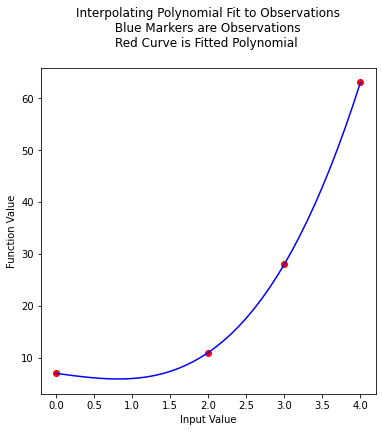

In [5]:
import matplotlib.pyplot # the python plotting library
myfigure = matplotlib.pyplot.figure(figsize = (6,6)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(xtable, ytable ,color ='red') # The observations as points
matplotlib.pyplot.plot(xpred, ypred, color ='blue') # the polynomial
matplotlib.pyplot.xlabel("Input Value") 
matplotlib.pyplot.ylabel("Function Value") 
mytitle = "Interpolating Polynomial Fit to Observations\n "
mytitle += "Blue Markers are Observations " + "\n"
mytitle += "Red Curve is Fitted Polynomial "+ "\n"
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.show()

In [6]:
xtable = [0,2,3,4]
ytable = [7,11,28,63]

ypred = []

for i in range(len(xtable)): 
    ypred.append(lagint(xtable,ytable,xtable[i]))

print('Interpolation Error',ssq_err(ytable,ypred))

NameError: name 'ssq_err' is not defined

Now to finish the story lets apply our generic polynomial model to the same data and see what we can learn

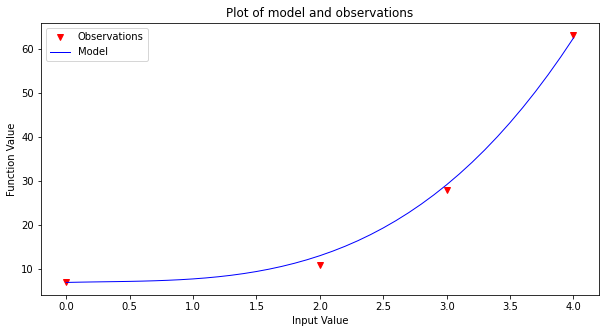

In [75]:
# observations
xtable = [0,2,3,4]
ytable = [7,11,28,63]
#
# build a data model
intercept=7
linear=0.69
quadratic=-0.95
cubic=1.06
#
xpred = [] # empty list to store results for plotting
ypred = [] # empty list to store results for plotting
#
step_size = 0.10  # step size
how_many = int((xtable[len(xtable)-1])/step_size)
# build the predictions
for i in range(how_many+1): 
    xpred.append(float(i)*step_size)
    ypred.append(polynomial(intercept,linear,quadratic,cubic,xpred[i]))

make2plot(xtable,ytable,xpred,ypred,'Input Value','Function Value','Plot of model and observations')

In [78]:
xtable = [0,2,3,4]
ytable = [7,11,28,63]

ypred = []

for i in range(len(xtable)): 
    ypred.append(polynomial(intercept,linear,quadratic,cubic,xtable[i]))

print('Interpolation Error',ssq_err(ytable,ypred))

Interpolation Error 5.9031999999999885


Unlike the Lagrangian interpolation, here we can extrapolate, simply by using the data model.

<hr>

## References

1. Grus, Joel (2015-04-14). Data Science from Scratch: First Principles with Python
(Kindle Locations 1190-1191). O'Reilly Media. Kindle Edition. 

2. Call Expressions in "Adhikari, A. and DeNero, J. Computational and Inferential Thinking The Foundations of Data Science" https://www.inferentialthinking.com/chapters/03/3/Calls.html

3. Functions and Tables in "Adhikari, A. and DeNero, J. Computational and Inferential Thinking The Foundations of Data Science" https://www.inferentialthinking.com/chapters/08/Functions_and_Tables.html

4. Visualization in "Adhikari, A. and DeNero, J. Computational and Inferential Thinking The Foundations of Data Science" https://www.inferentialthinking.com/chapters/07/Visualization.html

5. Documentation; The Python Standard Library; 9. Numeric and Mathematical Modules https://docs.python.org/2/library/math.html

6. https://matplotlib.org/gallery/lines_bars_and_markers/horizontal_barchart_distribution.html?highlight=horizontal%20bar%20chart

7. https://www.geeksforgeeks.org/bar-plot-in-matplotlib/